In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [155]:
#Converting Text to CSV
def _TxtToCsv(filename):
    f = open(filename)
    lines = f.readlines()
    List = np.empty((len(lines), 2), dtype=np.dtype('U1000'))
    j = 0
    for i in lines:
        i = i.rstrip()
        i = i.split(";")
        List[j][0] = i[0]
        List[j][1] = i[1]
        j = j + 1
    return List

In [156]:
trainList = _TxtToCsv('D:\\MasterFiles\\NLP\\Sentiment analysis\\train_data.txt')
testList = _TxtToCsv('D:\\MasterFiles\\NLP\\Sentiment analysis\\test_data.txt')
df = pd.DataFrame(data=trainList, columns=["Text" ,"Sentiment"])
df_Test = pd.DataFrame(data=testList, columns=["Text" ,"Sentiment"])
df_Test

,Text,Sentiment
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unkind to me and doing me wrong and then all i can think of doing is to get back at them and the people they are close to,anger
1996,im feeling a little cranky negative after this doctors appointment,anger
1997,i feel that i am useful to my people and that gives me a great feeling of achievement,joy
1998,im feeling more comfortable with derby i feel as though i can start to step out my shell,joy


joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise    572 
Name: Sentiment, dtype: int64


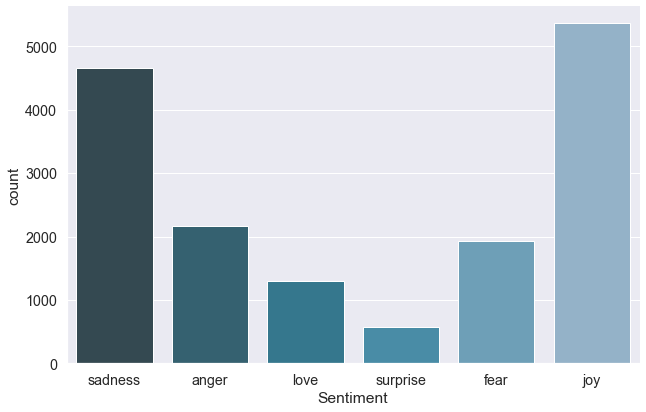

In [157]:
sns.factorplot(x="Sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
print(df.Sentiment.value_counts())
plt.show();

In [158]:

tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Text'])
text_tf_Test= tf.transform(df_Test['Text'])

In [159]:

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(text_tf, df['Sentiment'])
predicted= clf.predict(text_tf_Test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_Test['Sentiment'], predicted))

MultinomialNB Accuracy: 0.6485


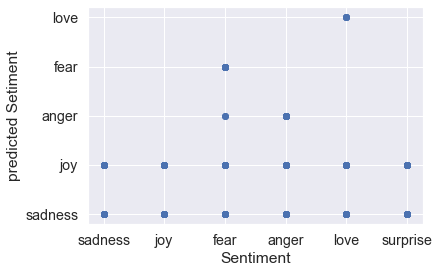

In [160]:
plt.scatter(df_Test['Sentiment'], predicted)
plt.plot()
plt.xlabel('Sentiment')
plt.ylabel('predicted Setiment')
plt.show()

In [161]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Text'])
text_counts_Test= cv.transform(df_Test['Text'])

In [162]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(text_counts, df['Sentiment'])
predicted= clf.predict(text_counts_Test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(df_Test['Sentiment'], predicted))

MultinomialNB Accuracy: 0.7915


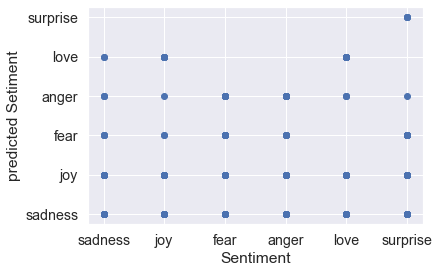

In [163]:
plt.scatter(df_Test['Sentiment'], predicted)
plt.plot()
plt.xlabel('Sentiment')
plt.ylabel('predicted Setiment')
plt.show()

In [164]:
TestSentence = ["I feel like I am going to die"]
counts= cv.transform(TestSentence)
predicted= clf.predict(counts)
predicted

array(['sadness'], dtype='<U8')

In [165]:
TestSentence = ["Today is a day to do awsome works"]
counts= cv.transform(TestSentence)
predicted= clf.predict(counts)
predicted

array(['joy'], dtype='<U8')

# preprocessing code ( didn't use)

In [ ]:
# PreProcessing
df.loc[:,"Text"] = df.Text.apply(lambda x : str.lower(x))
df_Test.loc[:,"Text"] = df.Text.apply(lambda x : str.lower(x))

# remove punctuation and numbers
df.loc[:,"Text"] = df.Text.apply(lambda x : " ".join(re.findall('[\w]+',x)))
df_Test.loc[:,"Text"] = df.Text.apply(lambda x : " ".join(re.findall('[\w]+',x)))

#RemoveStopwords
stop_words=set(stopwords.words("english"))

def remove_stopWords(s):
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

df.loc[:,"Text"] = df.Text.apply(lambda x: remove_stopWords(x))
df_Test.loc[:,"Text"] = df.Text.apply(lambda x: remove_stopWords(x))


porter = PorterStemmer()
lancaster=LancasterStemmer()
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Text'] = df.Text.apply(lambda x: porter.stem(x)) # Stem every word.
df['Text'] = df.Text.apply(lambda x: lancaster.stem(x))
#df = df.drop(columns=['unstemmed']) # Get rid of the unstemmed column.

df